#IMPORTING LIBRARIES

In [753]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, auc

#DATA EXPLORATION

In [754]:
df = pd.read_csv("dataset.csv")
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [755]:
df.shape

(4424, 35)

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

*   Marital status: The marital status of the student. (Categorical)
*   Application mode: The method of application used by the student. (Categorical)
*   Application order: The order in which the student applied. (Numerical)
*   Course: The course taken by the student. (Categorical)
*   daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
*   Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
*   Nationality: The nationality of the student. (Categorical)
*   Mother's qualification: The qualification of the student's mother. (Categorical)
*   Father's qualification: The qualification of the student's father. (Categorical)
*   Mother's occupation: The occupation of the student's mother. (Categorical)
*   Father's occupation: The occupation of the student's father. (Categorical)
*   Displaced: Whether the student is a displaced person. (Categorical)
*   Educational special needs: Whether the student has any special educational needs. (Categorical)
*   Debtor: Whether the student is a debtor. (Categorical)
*   Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
*   Gender: The gender of the student. (Categorical)
*   Scholarship holder: Whether the student is a scholarship holder. (Categorical)
*   Age at enrollment: The age of the student at the time of enrollment. (Numerical)
*   International: Whether the student is an international student. (Categorical)
*   Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)
*   Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)
*   Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)
*   Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)

In [757]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [758]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [759]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


#FIX TARGET

In [760]:
# Remove 'Enrolled'
df = df[df['Target'] != 'Enrolled']

# Encode target
#df['Target'] = df['Target'].map({'Graduate': 0, 'Dropout': 1})

df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421


In [761]:
df.shape

(3630, 35)

#EDA

In [762]:
categorical_cols = [
    'Marital status',
    'Application mode',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International'
]

numerical_cols = [
    'Application order',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)'
]

In [763]:
print(df.duplicated().sum())

0


In [764]:
output=df['Target']
output.value_counts()

,count
Target,
Graduate,2209
Dropout,1421


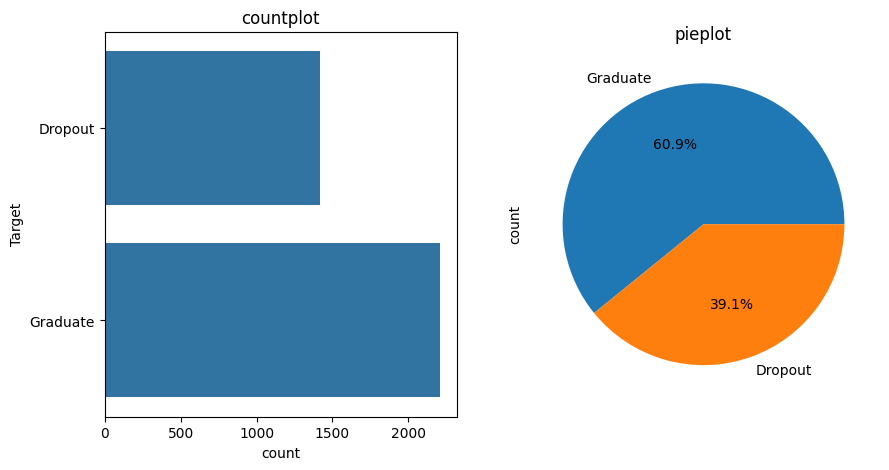

In [765]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(output,ax=ax[0])
ax[0].set_title('countplot')
output.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
ax[1].set_title('pieplot')
plt.show()

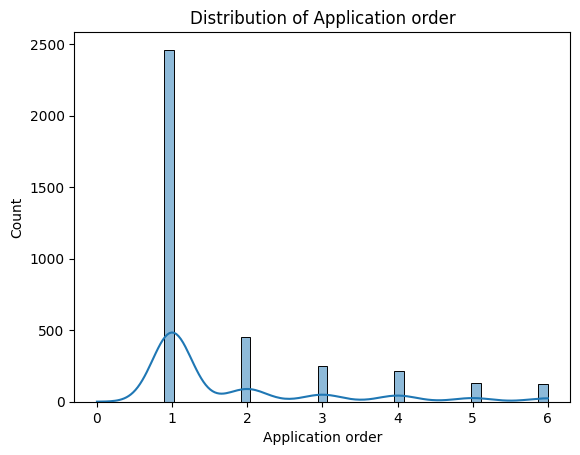

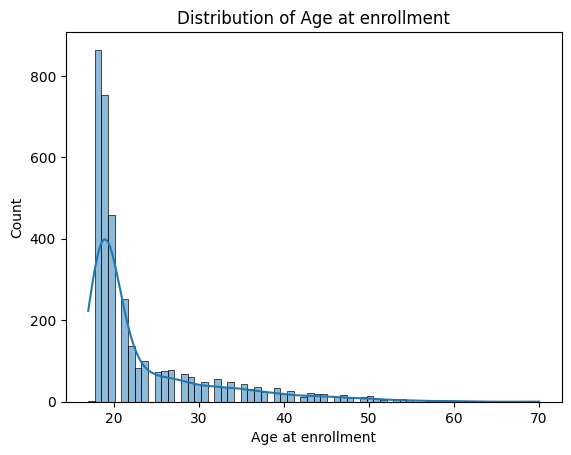

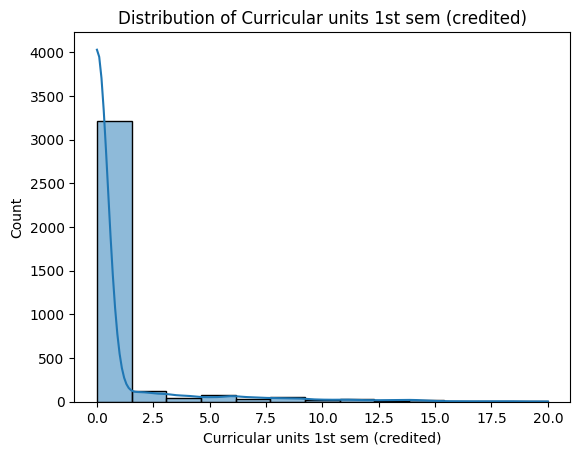

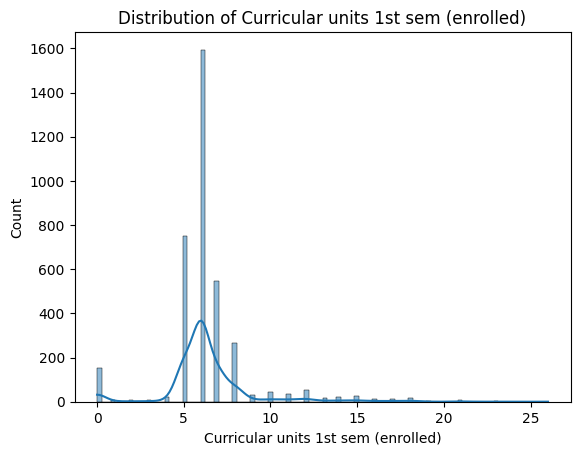

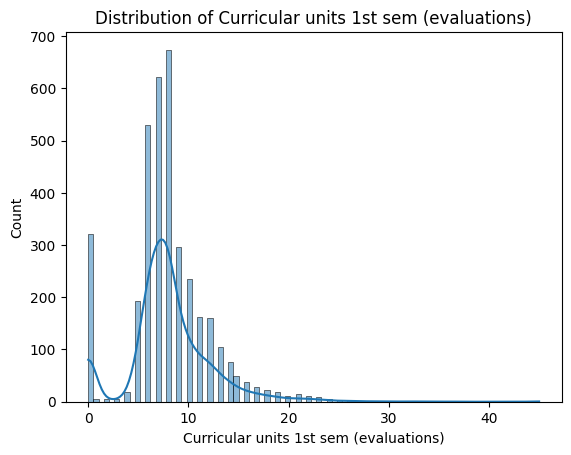

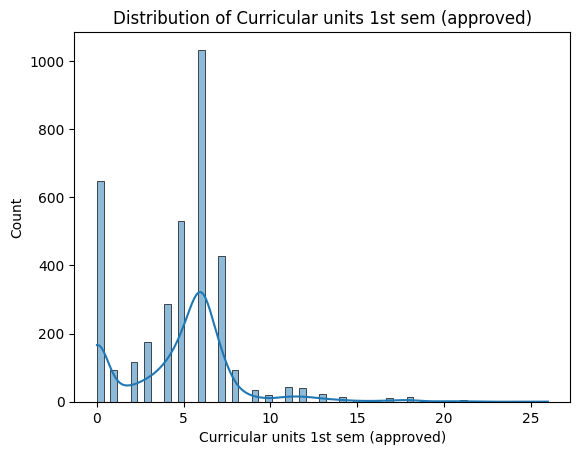

In [766]:
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

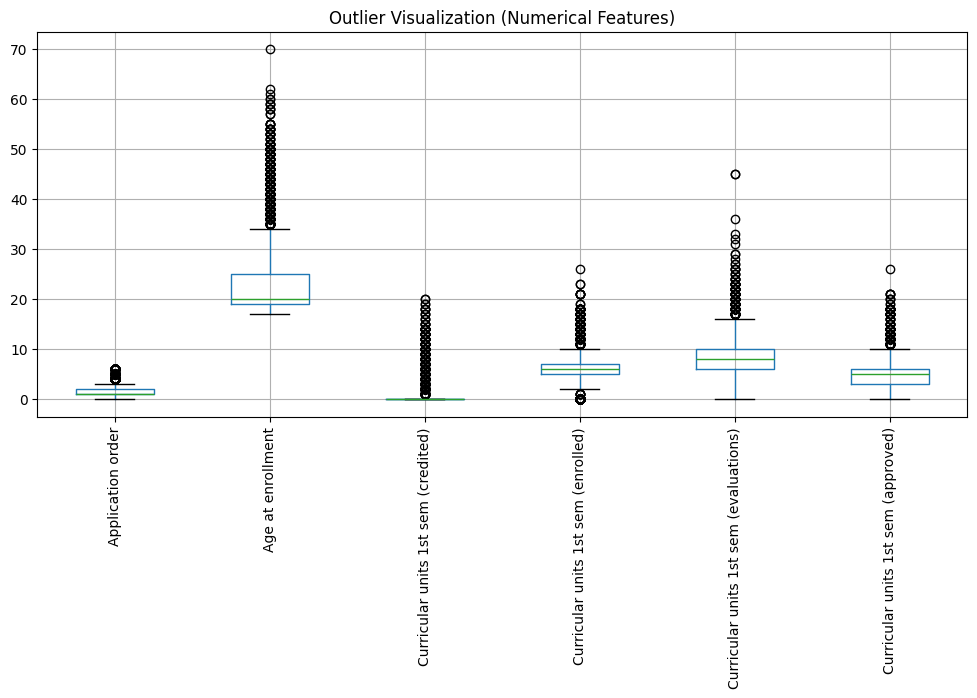

In [767]:
plt.figure(figsize=(12,5))
df[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Outlier Visualization (Numerical Features)")
plt.show()

In [768]:
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

df = cap_outliers_iqr(df, numerical_cols)

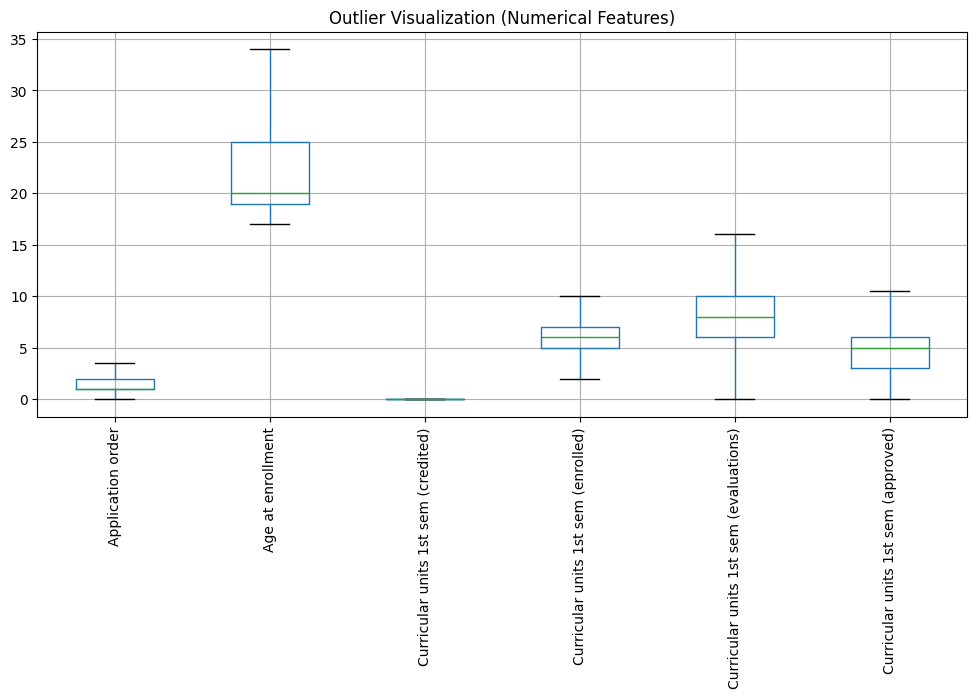

In [769]:
plt.figure(figsize=(12,5))
df[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Outlier Visualization (Numerical Features)")
plt.show()

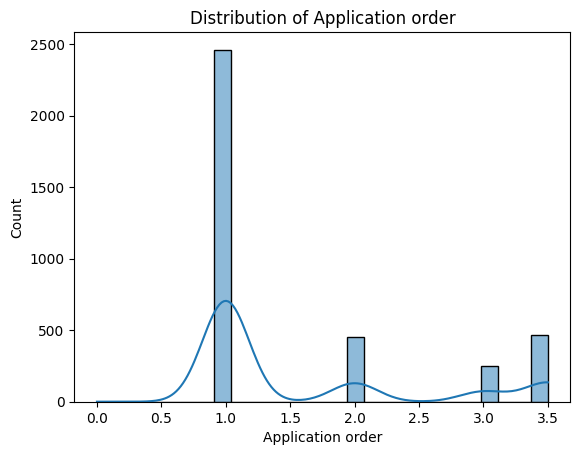

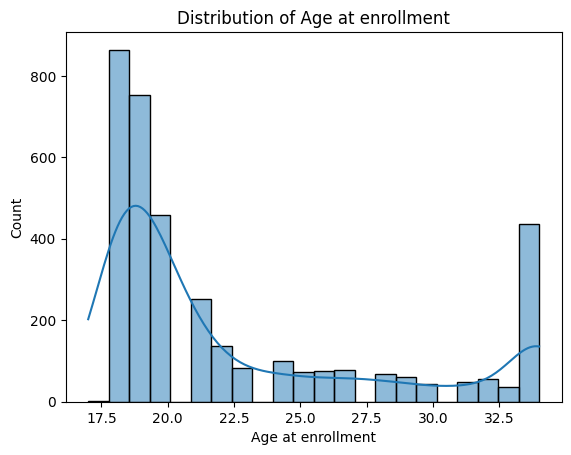

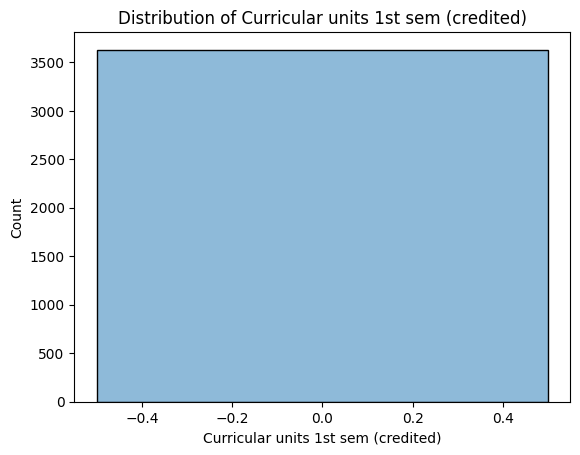

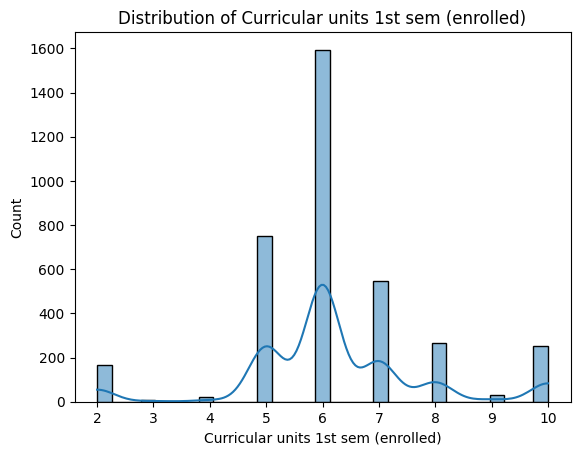

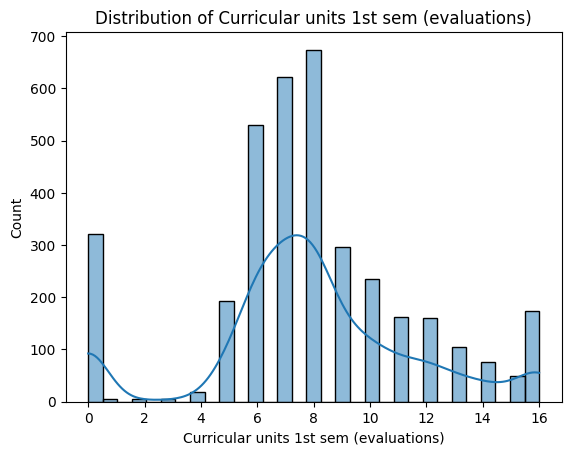

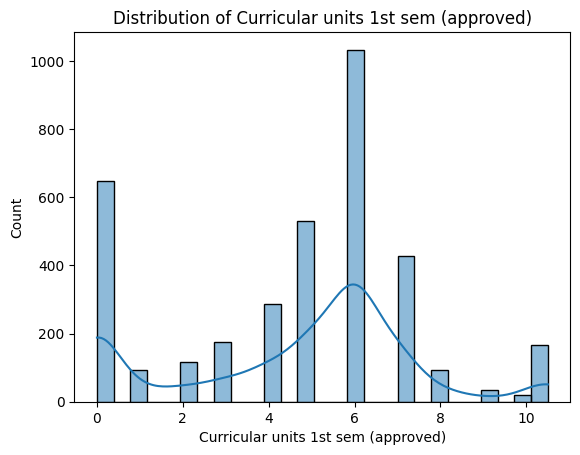

In [770]:
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [771]:
df.drop('Curricular units 1st sem (credited)', axis=1, inplace=True)

In [772]:
#counting all unique value of each collumn in single loop
for col in categorical_cols:
    print(col.upper())
    print(df[col].unique())
    print("---------------------------------------------------------")

MARITAL STATUS
[1 2 4 3 5 6]
---------------------------------------------------------
APPLICATION MODE
[ 8  6  1 12  9 17 16 14 15  4 13  7  3  2  5 18 10 11]
---------------------------------------------------------
COURSE
[ 2 11  5 15  3 17 12 10 14 16  6  8  9  1  7  4 13]
---------------------------------------------------------
DAYTIME/EVENING ATTENDANCE
[1 0]
---------------------------------------------------------
PREVIOUS QUALIFICATION
[ 1 12 16  8 14  3 15  2  4  9 17 11  6  7 13  5 10]
---------------------------------------------------------
NACIONALITY
[ 1 15  3 14 12 18  5 11 17  4  9 16 10 21  2  8  6  7 19]
---------------------------------------------------------
MOTHER'S QUALIFICATION
[13  1 22 23  3 27  2 19  4 10 25  7  5 24  9 26 18 11 20 21  6  8 17 12
 28 14 16 15 29]
---------------------------------------------------------
FATHER'S QUALIFICATION
[10  3 27 28  1 14  4 24 29  2  5  9  7 26 18 30 12 15 25 31 16 11 20 33
 13 32  8  6 21 17 34 23 19 22]
-----------

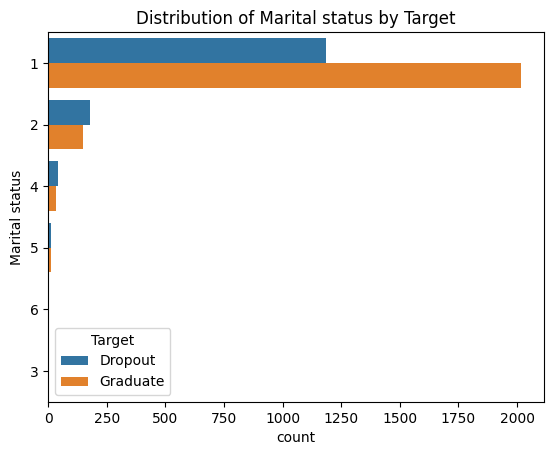

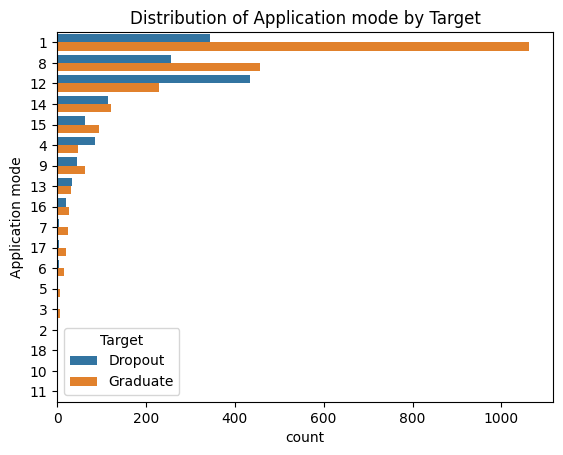

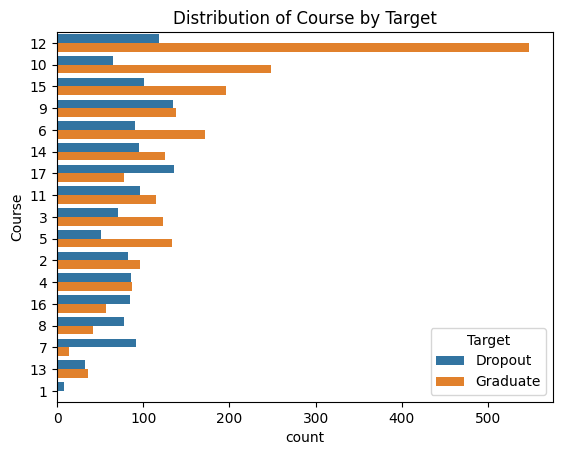

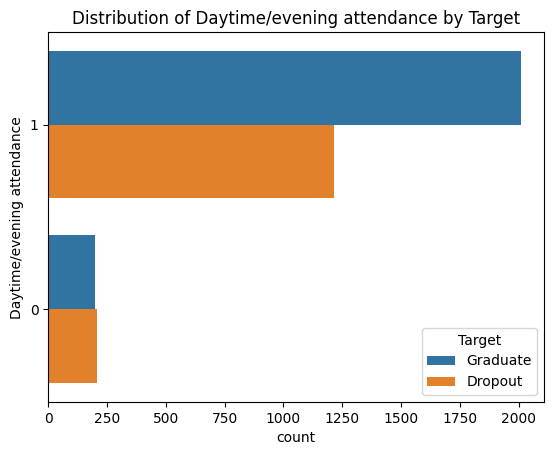

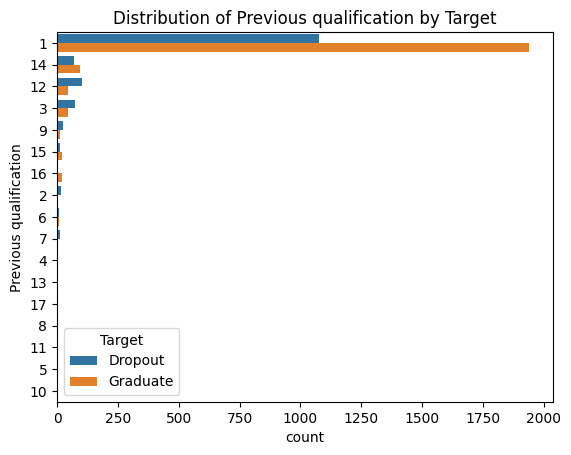

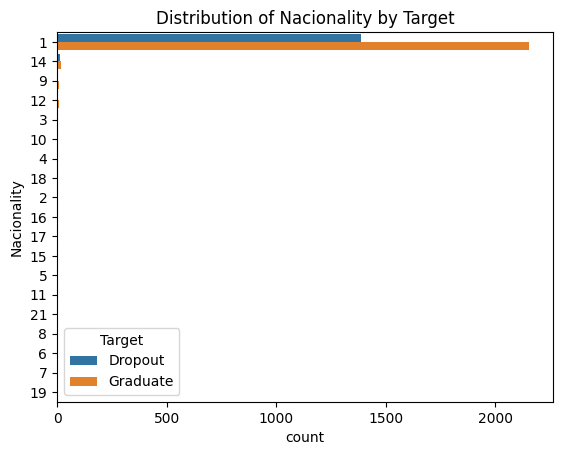

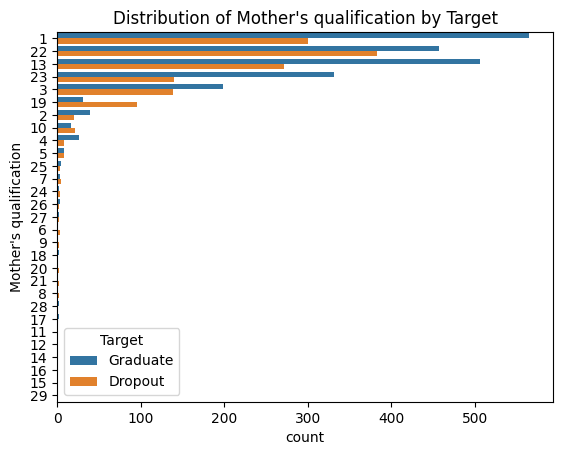

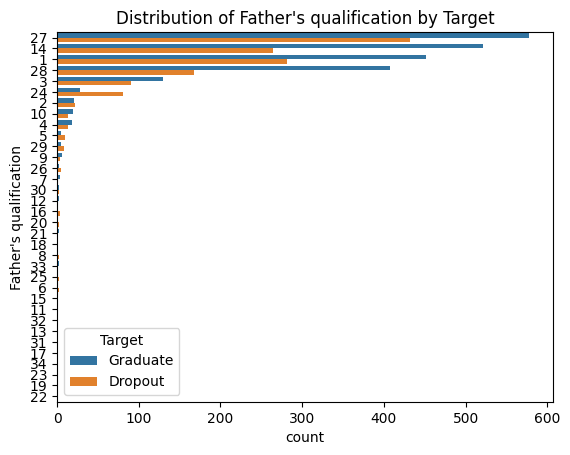

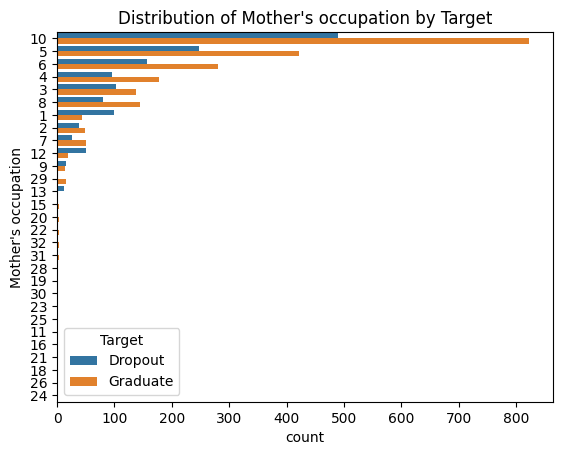

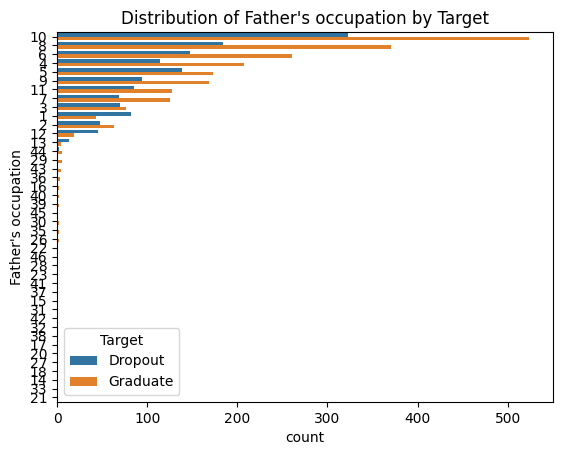

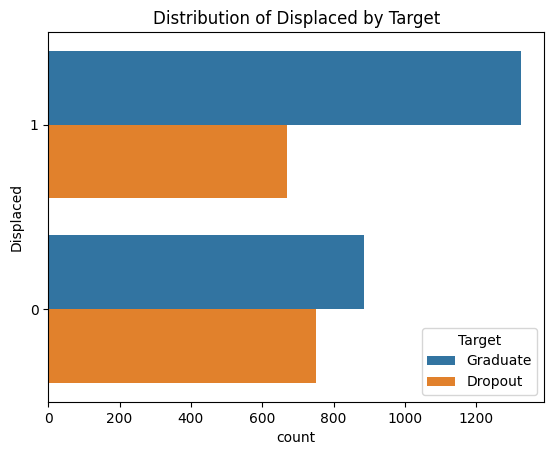

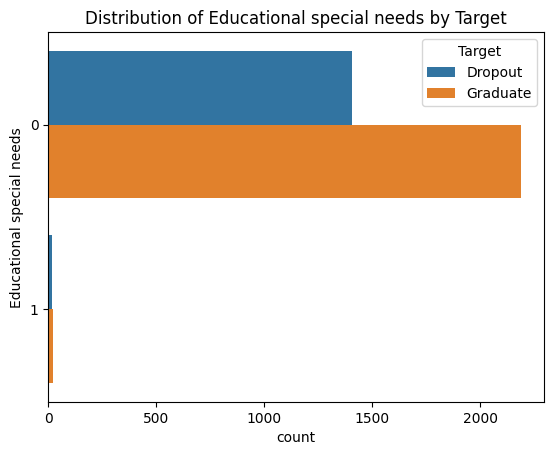

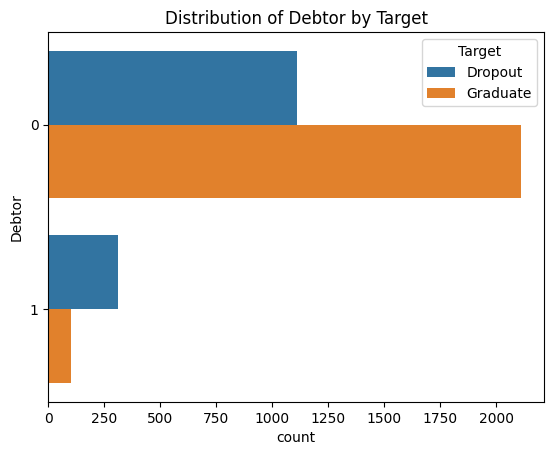

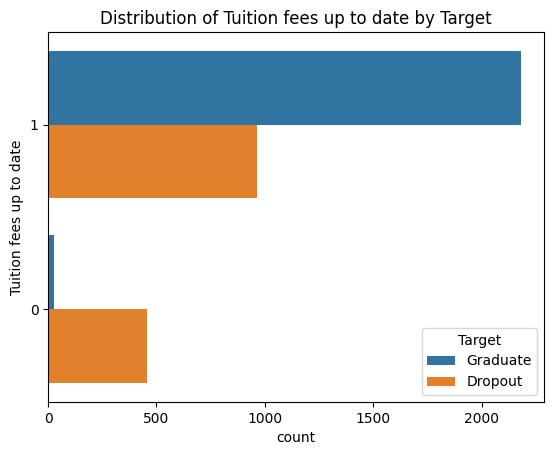

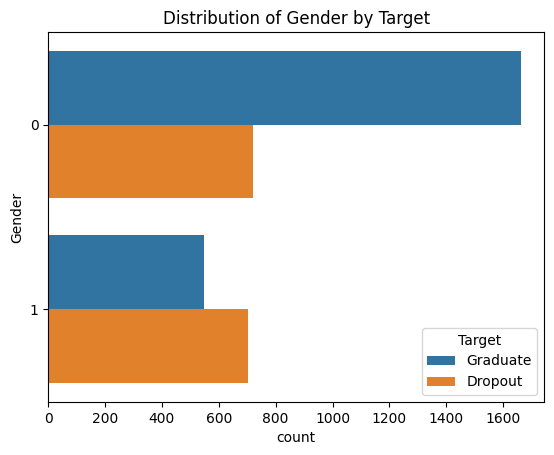

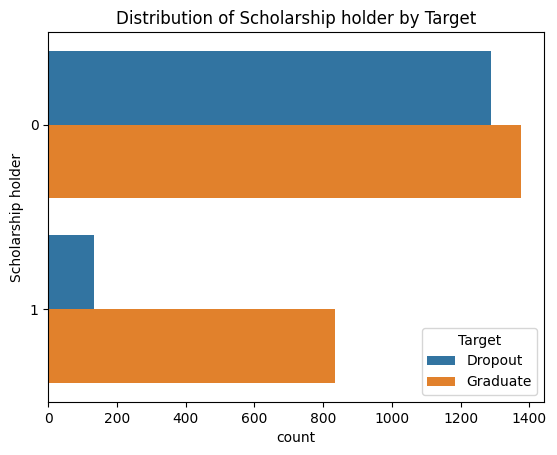

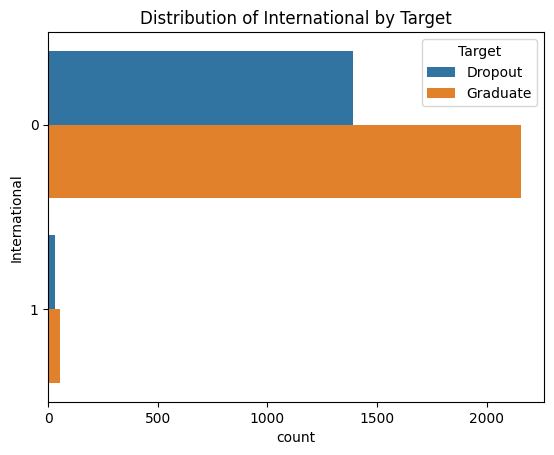

In [773]:
for col in categorical_cols:
    sns.countplot(y=col, hue='Target', data=df,
                  order=df[col].value_counts().index)
    plt.title(f"Distribution of {col} by Target")
    plt.legend(title='Target')
    plt.show()

In [774]:
"""for col in categorical_cols:
    prop_df = (
        df.groupby(col)['Target']
        .value_counts(normalize=True)
        .unstack()
    )
    prop_df.plot(kind="barh", stacked=True)
    plt.title(f"Distribution of {col} by Target (Proportion)")
    plt.xlabel("Proportion")
    plt.legend(title='Target')
    plt.show()
    """

'for col in categorical_cols:\n    prop_df = (\n        df.groupby(col)[\'Target\']\n        .value_counts(normalize=True)\n        .unstack()\n    )\n    prop_df.plot(kind="barh", stacked=True)\n    plt.title(f"Distribution of {col} by Target (Proportion)")\n    plt.xlabel("Proportion")\n    plt.legend(title=\'Target\')\n    plt.show()\n    '

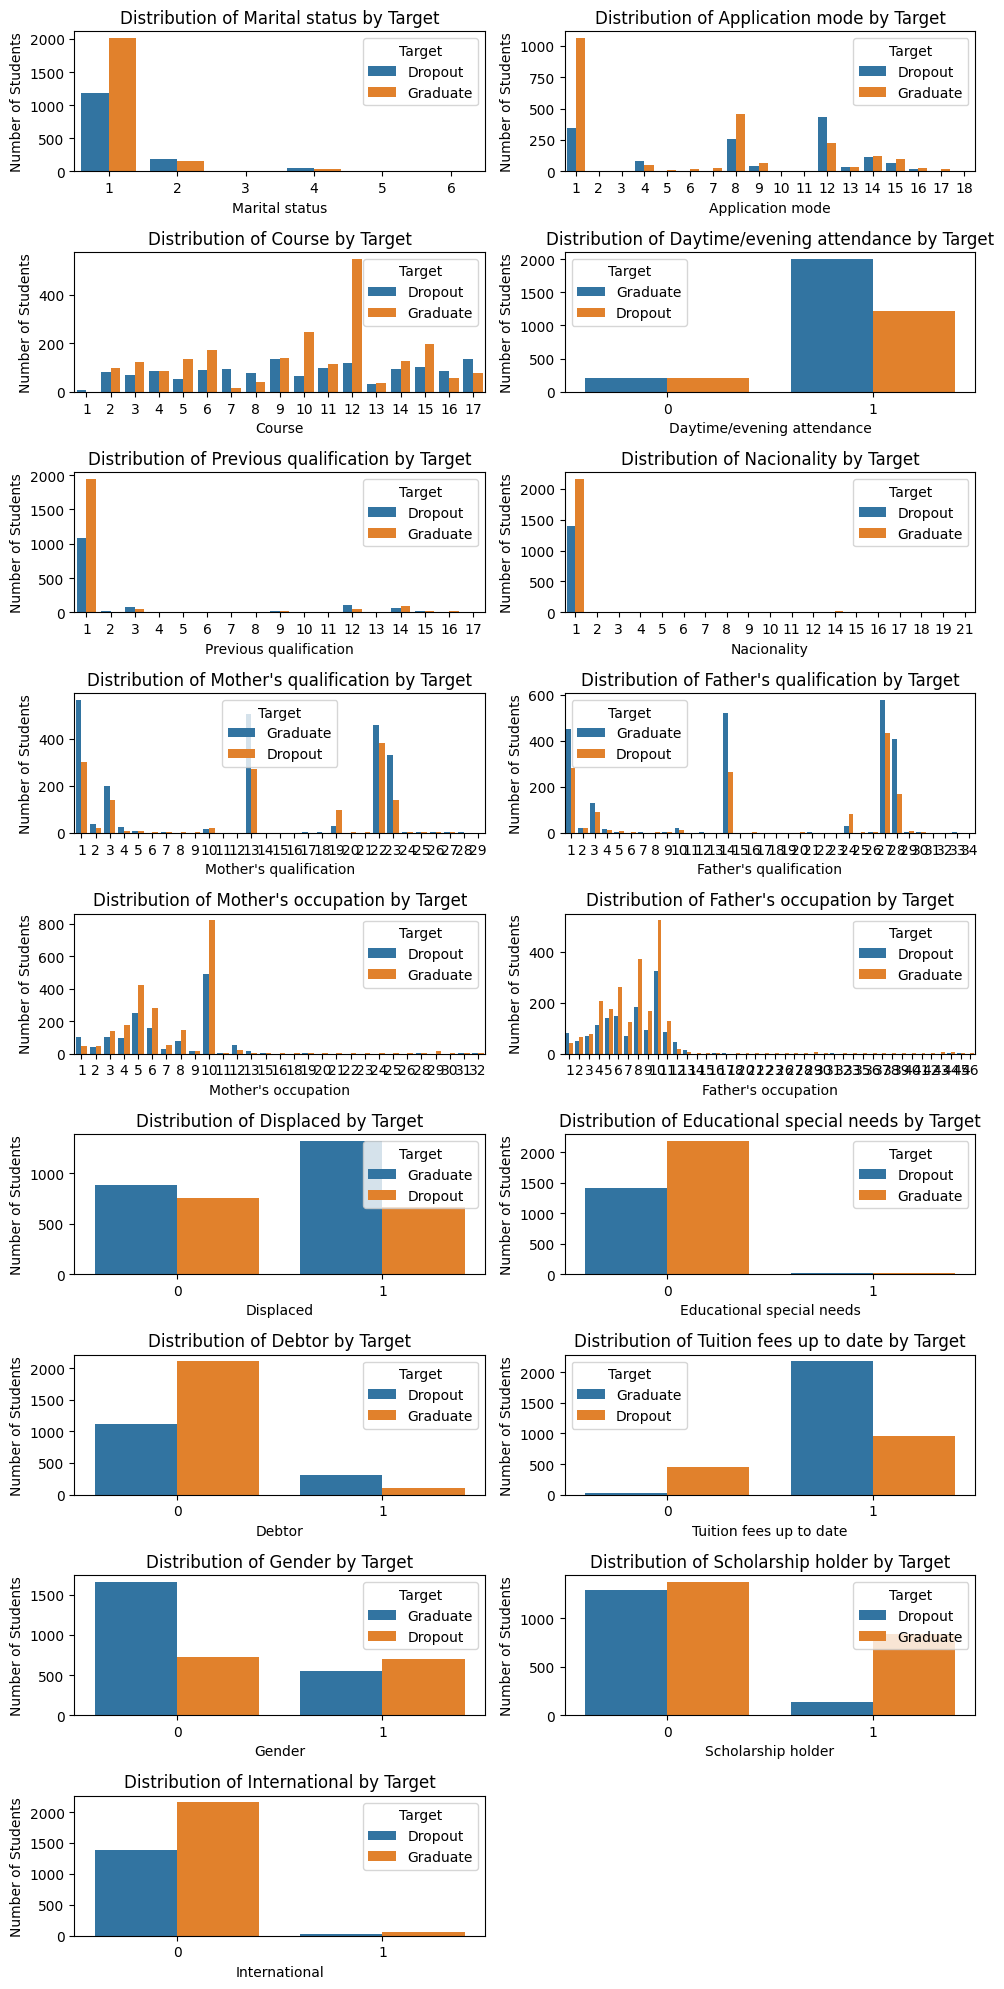

In [775]:
fig, axes = plt.subplots(9, 2, figsize=(10,20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Target', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Target')
    axes[i].legend(title='Target')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of Students')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#FEATURE SELECTION

In [776]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,3.5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1.0,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,3.5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2.0,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1.0,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [777]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,3.5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1.0,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,3.5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2.0,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1.0,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


<Axes: >

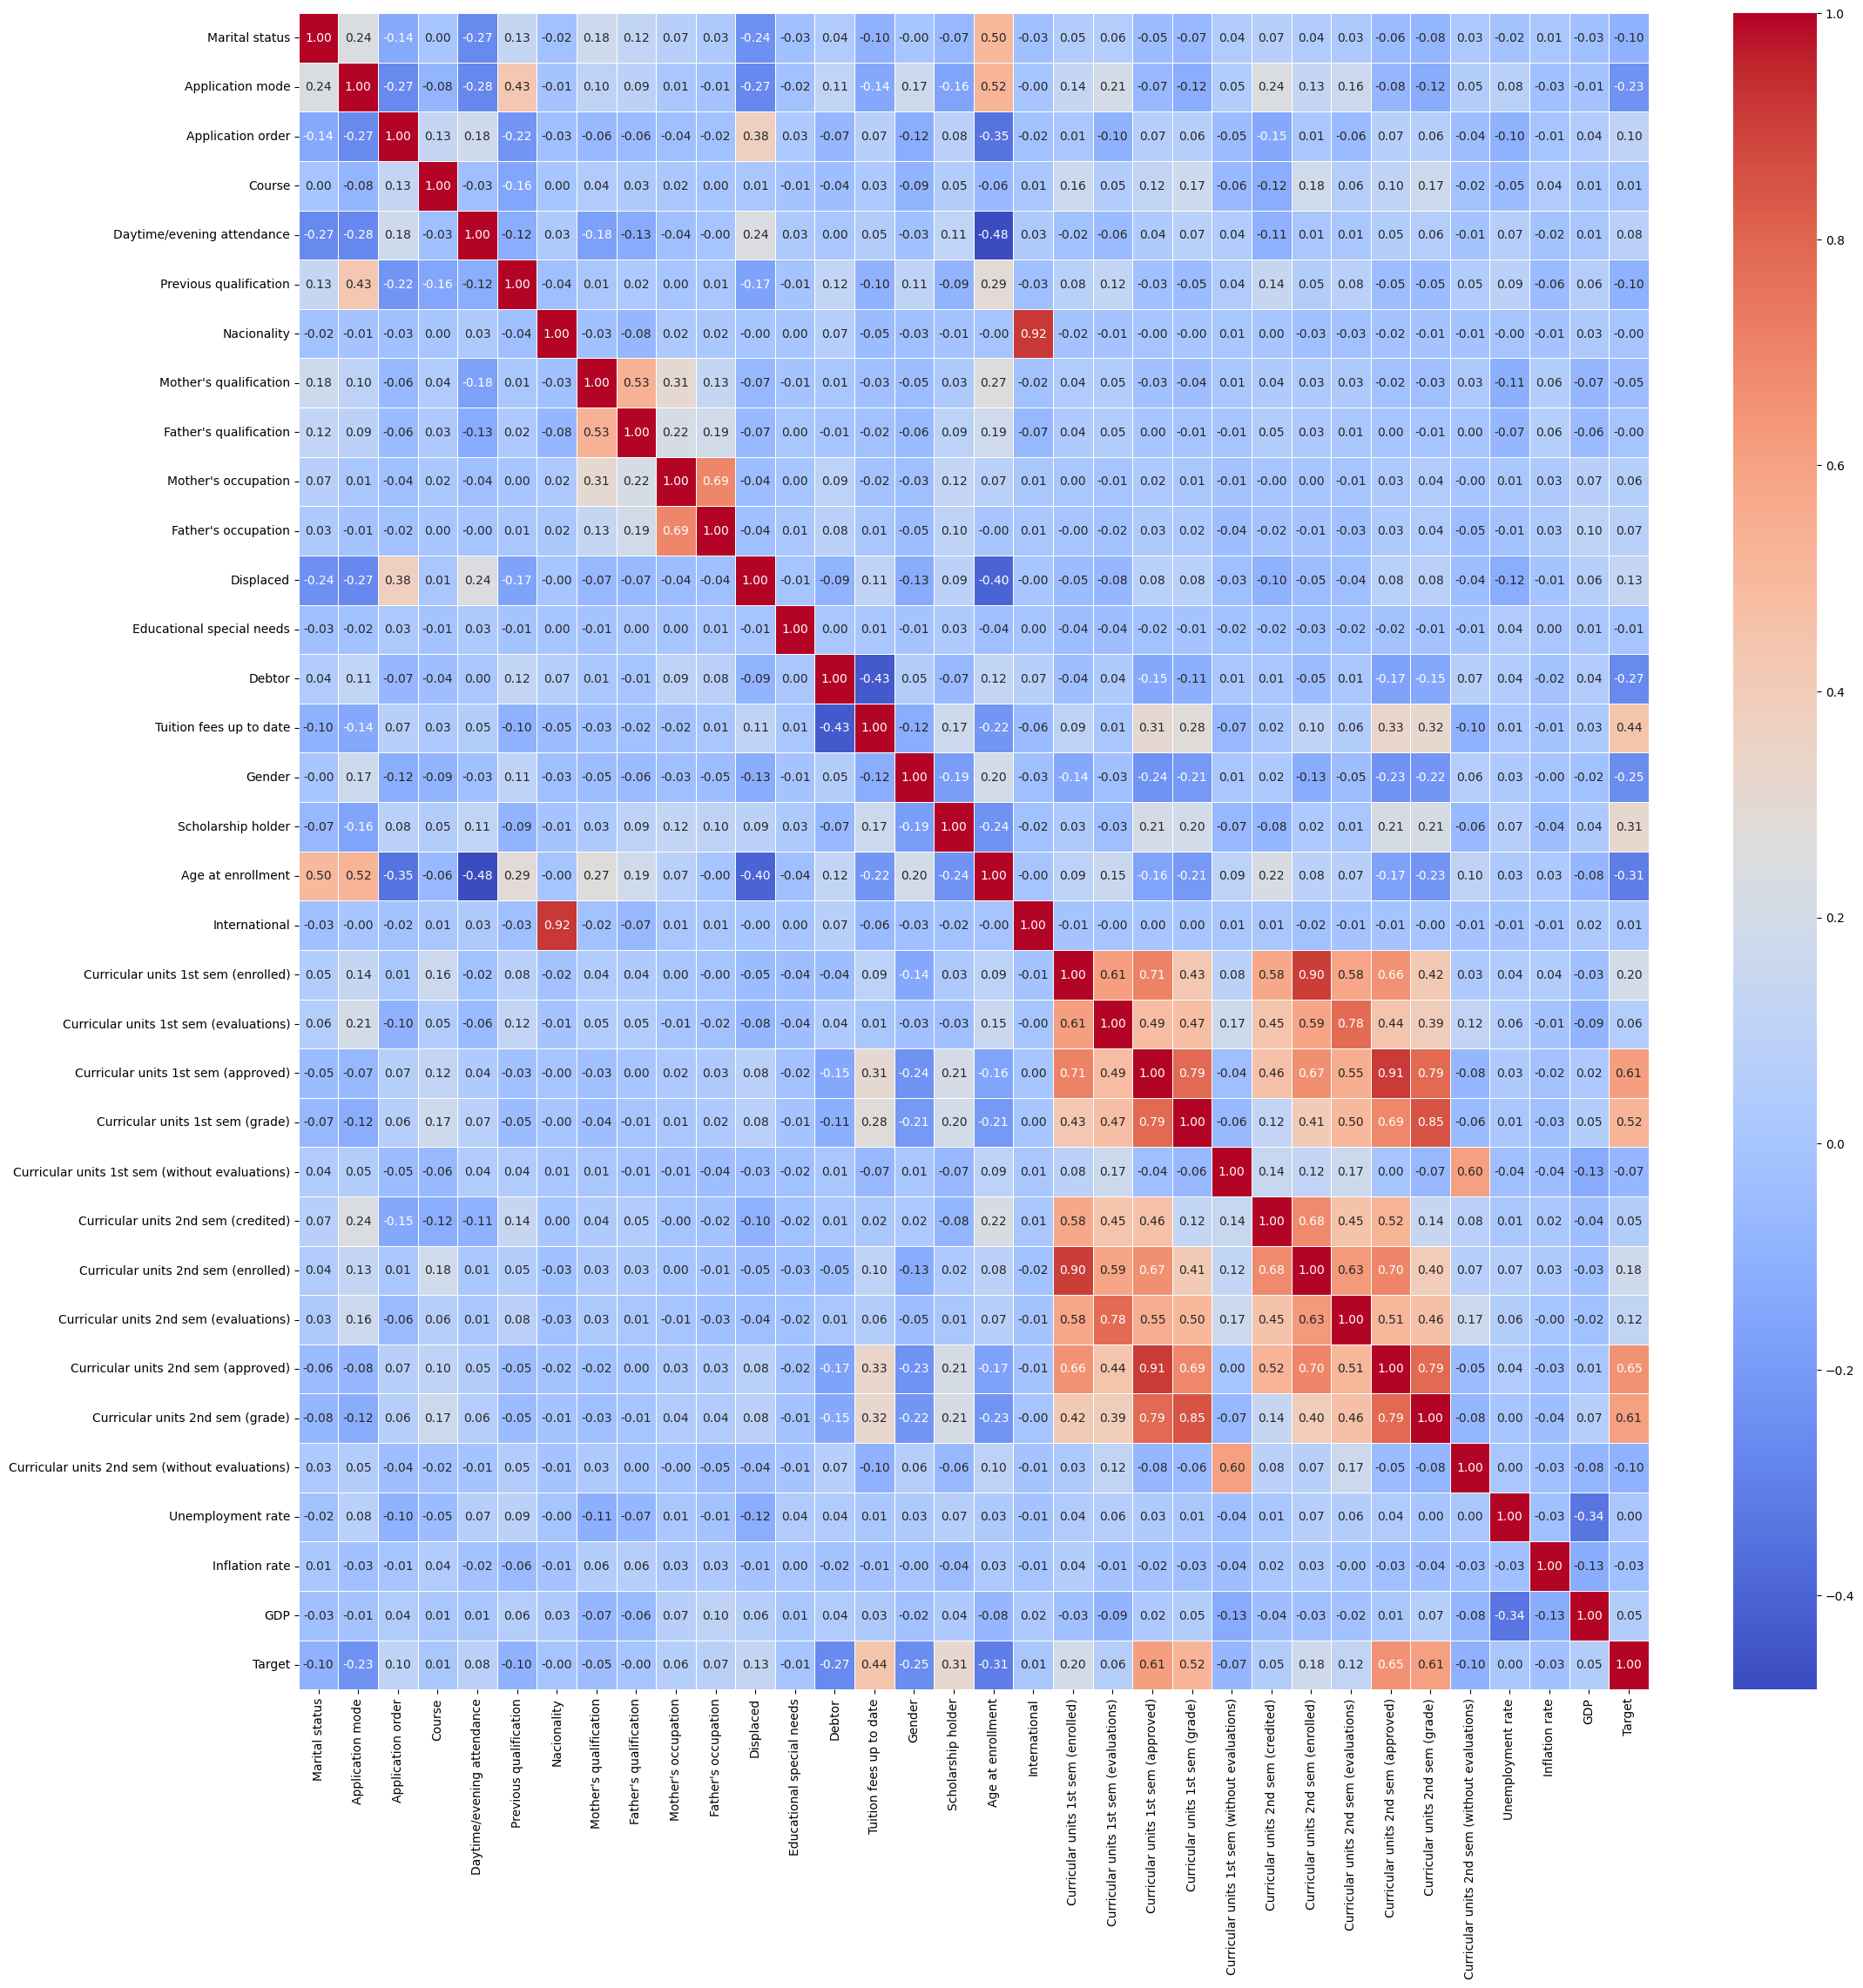

In [778]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [779]:
tobe_removed=['Nacionality','International','Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (evaluations)','Father\'s occupation']

In [780]:
#drop column
df=df.drop(tobe_removed,axis=1)

<Axes: >

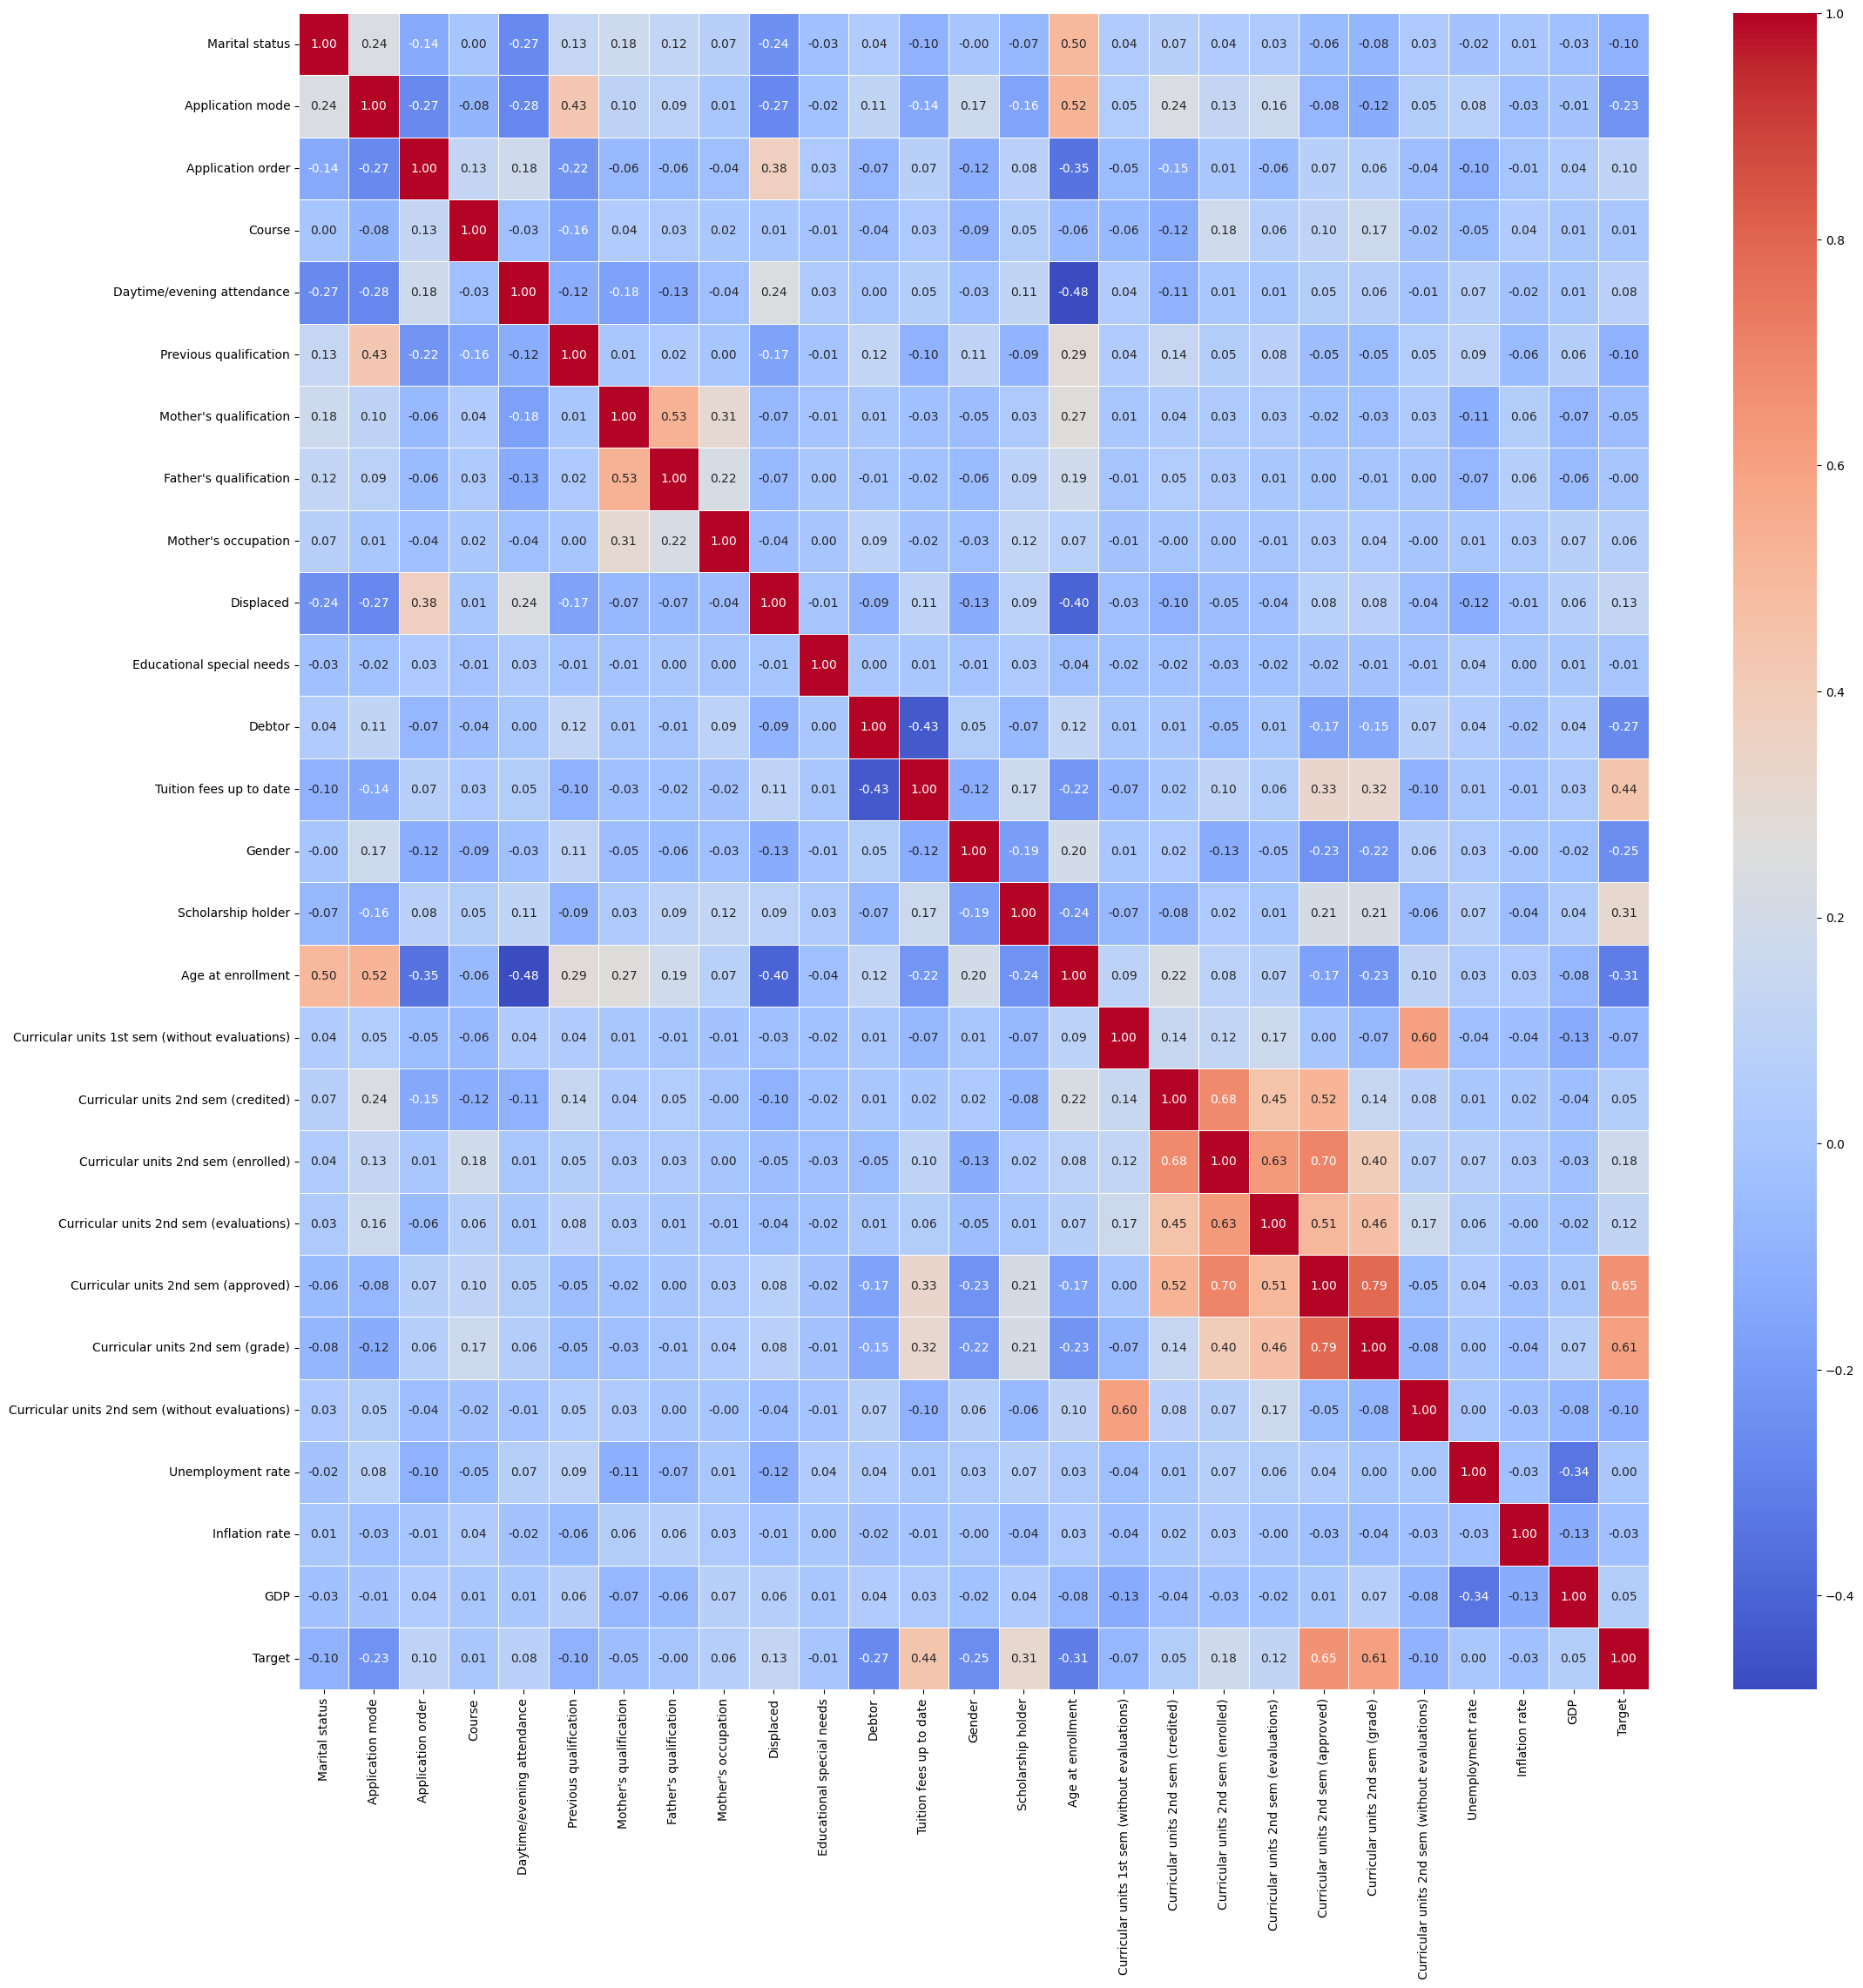

In [781]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [782]:
df.shape

(3630, 27)

#DATA PREPROCESSING

In [783]:
student_data=df
student_data.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Displaced,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,3.5,2,1,1,13,10,6,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1.0,11,1,1,1,3,4,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1


In [784]:
X = student_data.drop('Target', axis=1)
y = student_data['Target']

In [785]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Displaced,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,3.5,2,1,1,13,10,6,1,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1.0,11,1,1,1,3,4,1,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,3.5,5,1,1,22,27,10,1,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2.0,15,1,1,23,27,6,1,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1.0,3,0,1,22,28,10,0,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [786]:
y.head()

,Target
0,0
1,1
2,0
3,1
4,1


In [787]:
#standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [788]:
Xcheck=pd.DataFrame(X)
Xcheck.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.300686,0.226505,2.061565,-1.828415,0.355850,-0.392879,0.049009,-0.606253,-0.327219,0.906297,...,-0.189871,-0.287686,-2.782691,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119
1,-0.300686,-0.154237,-0.627626,0.245261,0.355850,-0.392879,-1.283593,-1.243108,-0.866764,0.906297,...,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.662383,-0.190148,0.850919,-1.106070,0.353704
2,-0.300686,-1.106094,2.061565,-1.137190,0.355850,-0.392879,1.048460,0.940395,0.751869,0.906297,...,-0.189871,-0.287686,-0.131002,-1.958586,-1.429014,-1.831085,-0.190148,-0.311312,0.121615,0.774119
3,-0.300686,0.226505,0.448050,1.166895,0.355850,-0.392879,1.159510,0.940395,-0.327219,0.906297,...,-0.189871,-0.287686,-0.131002,0.564362,0.152293,0.431281,-0.190148,-0.836191,-1.467154,-1.376634
4,1.330837,0.987990,-0.627626,-1.598007,-2.810171,-0.392879,1.048460,1.031374,0.751869,-1.103391,...,-0.189871,-0.287686,-0.131002,-0.444817,0.468555,0.540750,-0.190148,0.850919,-1.106070,0.353704


In [789]:
Xcheck.shape

(3630, 26)

#TRAIN TEST SPLIT

In [790]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#MODEL TRAINIG

##LOGISTIC REGRESSION

In [791]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [792]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9077134986225895
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       277
           1       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



In [793]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[233  44]
 [ 23 426]]


<Axes: >

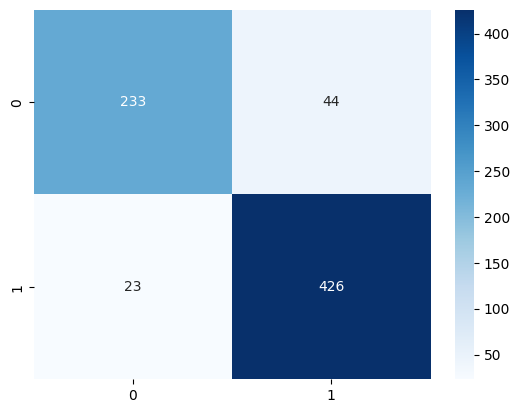

In [794]:
#plot confusion matrix in blue
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [795]:
#roc auc
y_prob_lr = lr.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(y_test, y_prob_lr)
print(roc_auc)

0.9535670925361615


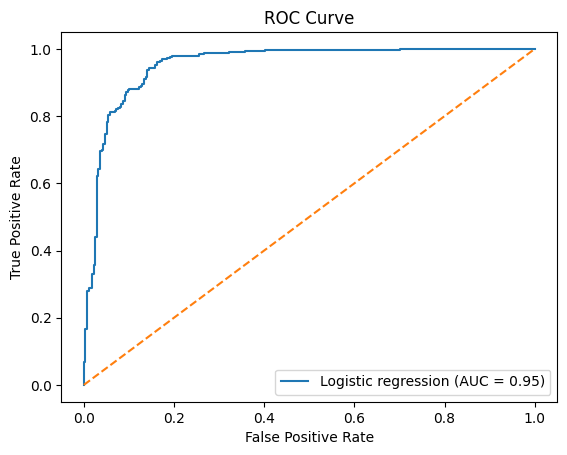

In [796]:
#plot roc auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f"Logistic regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##RANDOM FOREST

In [797]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [798]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8966942148760331
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       277
           1       0.89      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



In [799]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[227  50]
 [ 25 424]]


<Axes: >

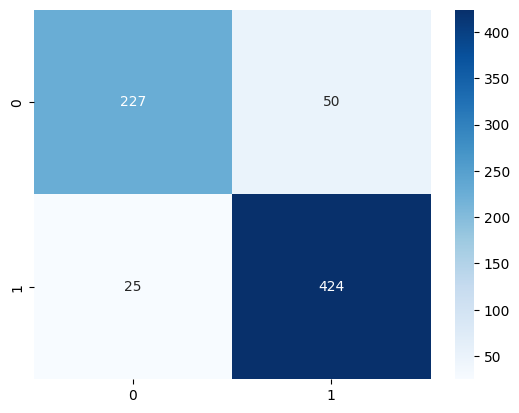

In [800]:
#plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [801]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(y_test, y_prob_rf)
print(roc_auc)

0.948352938338707


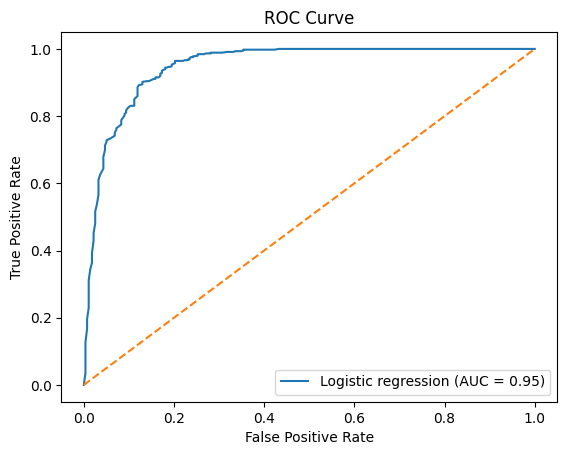

In [802]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"Logistic regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##DECISION TREE

In [803]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

In [804]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.8415977961432507
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       277
           1       0.88      0.86      0.87       449

    accuracy                           0.84       726
   macro avg       0.83      0.84      0.83       726
weighted avg       0.84      0.84      0.84       726



In [805]:
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[227  50]
 [ 65 384]]


<Axes: >

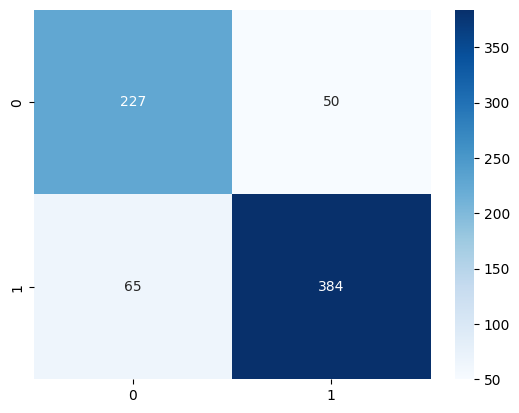

In [806]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [807]:
y_prob_dt = dt.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(y_test, y_prob_dt)
print(roc_auc)

0.8373642189221133


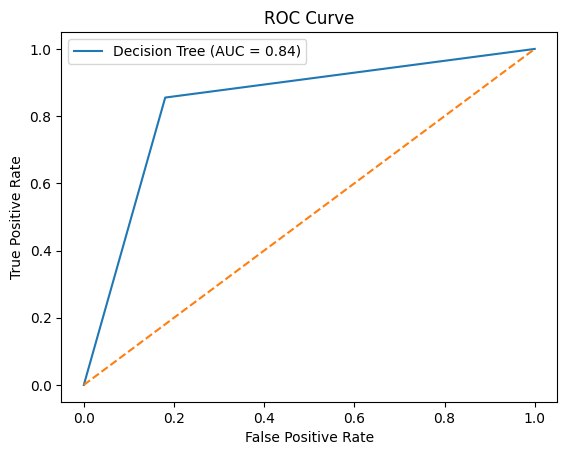

In [808]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##SUPPORT VECTOR MACHINE

In [809]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [810]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.8911845730027548
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       277
           1       0.88      0.96      0.92       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



In [811]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

[[216  61]
 [ 18 431]]


<Axes: >

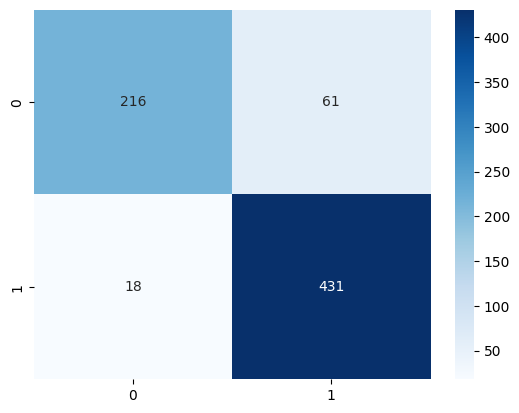

In [812]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [813]:
y_prob_svm = svm.decision_function(X_test)
roc_auc=roc_auc_score(y_test, y_prob_svm)
print(roc_auc)

0.9456875688453281


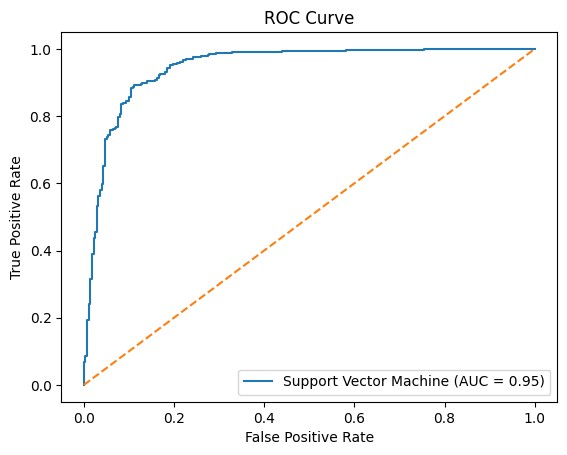

In [814]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f"Support Vector Machine (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##K NEARESR NEIGHBOR

In [815]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [816]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8429752066115702
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       277
           1       0.83      0.95      0.88       449

    accuracy                           0.84       726
   macro avg       0.86      0.81      0.82       726
weighted avg       0.85      0.84      0.84       726



In [817]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[187  90]
 [ 24 425]]


<Axes: >

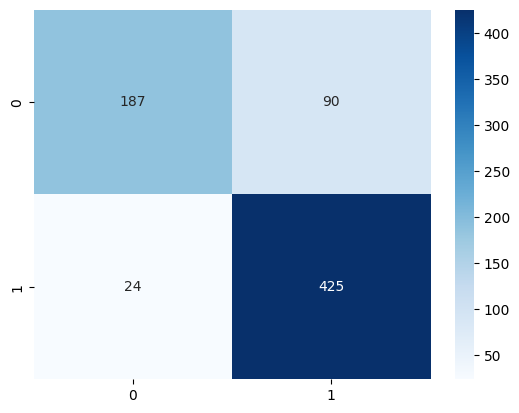

In [818]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [819]:
y_prob_knn = knn.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(y_test, y_prob_knn)
print(roc_auc)

0.8743055164706166


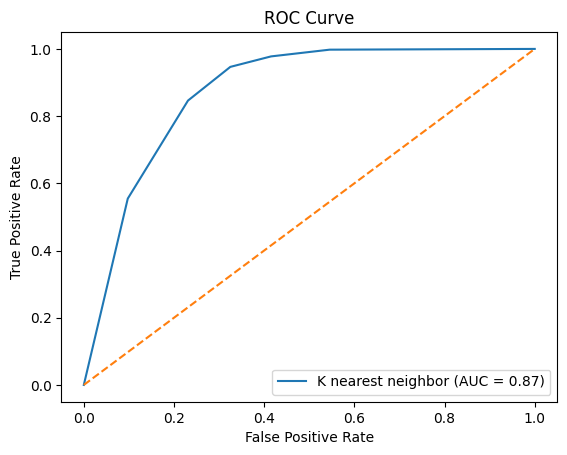

In [820]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn)
plt.plot(fpr, tpr, label=f"K nearest neighbor (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##XGBOOST

In [821]:
#xgboost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [822]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.8925619834710744
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       277
           1       0.89      0.94      0.92       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



In [823]:
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[224  53]
 [ 25 424]]


<Axes: >

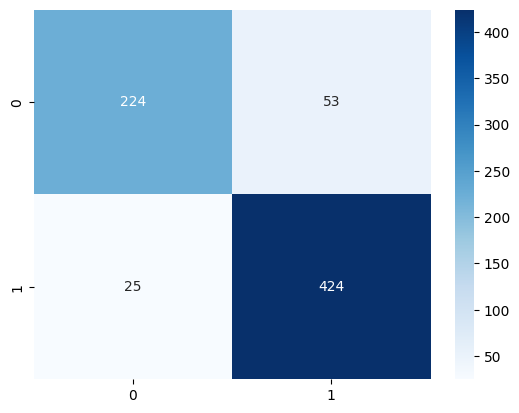

In [824]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [825]:
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
roc_auc=roc_auc_score(y_test, y_prob_xgb)
print(roc_auc)

0.9449076568065415


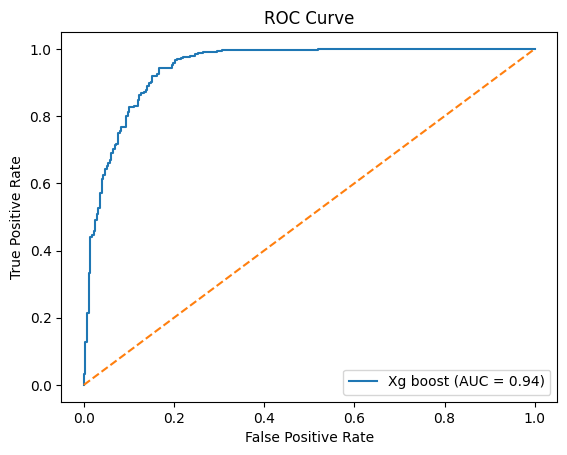

In [826]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label=f"Xg boost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#ACCURACY OF ALL MODEL

In [827]:
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "SVM": svm,
    "KNN": knn,
    "Random Forest": rf, # Added this as you imported it
    "XGBoost": xgb
}

# 2. Dictionary to store results
results = []

# 3. Loop through models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)

    results.append({"Model": name, "Base Accuracy": acc})

# 4. Create a DataFrame to view results
base_results_df = pd.DataFrame(results).sort_values(by='Base Accuracy', ascending=False)
print(base_results_df)

                 Model  Base Accuracy
0  Logistic Regression       0.907713
4        Random Forest       0.896694
5              XGBoost       0.892562
2                  SVM       0.891185
3                  KNN       0.842975
1        Decision Tree       0.841598


#GRID SEARCH CV

In [828]:
#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [829]:
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [2000, 5000],
        'penalty': ['l1', 'l2']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "XGBoost": {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    }
}

# 2. Dictionary to store best models and parameters
tuned_models = {}
best_params = {}

print("Starting Hyperparameter Tuning... (This may take a minute)")

for name, grid in param_grids.items():
    # Select the base model class
    if name == "Logistic Regression": base_model = LogisticRegression(max_iter=2000)
    elif name == "Decision Tree": base_model = DecisionTreeClassifier()
    elif name == "Random Forest": base_model = RandomForestClassifier()
    elif name == "SVM": base_model = SVC()
    elif name == "KNN": base_model = KNeighborsClassifier()
    elif name == "XGBoost": base_model = XGBClassifier(eval_metric='logloss')

    # Run Grid Search
    clf = GridSearchCV(base_model, grid, cv=3, scoring='accuracy', n_jobs=-1)

    clf.fit(X_train, y_train)

    # Store best model and params
    tuned_models[name] = clf.best_estimator_
    best_params[name] = clf.best_params_

    print(f"{name} Tuned! Best Params: {clf.best_params_}")

Starting Hyperparameter Tuning... (This may take a minute)
Logistic Regression Tuned! Best Params: {'C': 1, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Decision Tree Tuned! Best Params: {'max_depth': 5, 'min_samples_split': 2}
Random Forest Tuned! Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
SVM Tuned! Best Params: {'C': 10, 'kernel': 'linear'}
KNN Tuned! Best Params: {'n_neighbors': 5, 'weights': 'uniform'}
XGBoost Tuned! Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [830]:
final_results = []

for name, model in tuned_models.items():

    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)

    final_results.append({"Model": name, "Tuned Accuracy": acc})

# Create final DataFrame
tuned_results_df = pd.DataFrame(final_results).sort_values(by='Tuned Accuracy', ascending=False)

# Merge with previous results to compare
comparison_df = pd.merge(base_results_df, tuned_results_df, on="Model")
comparison_df['Improvement'] = comparison_df['Tuned Accuracy'] - comparison_df['Base Accuracy']

print("\nFinal Model Comparison:")
print(comparison_df)


Final Model Comparison:
                 Model  Base Accuracy  Tuned Accuracy  Improvement
0  Logistic Regression       0.907713        0.910468     0.002755
1        Random Forest       0.896694        0.898072     0.001377
2              XGBoost       0.892562        0.895317     0.002755
3                  SVM       0.891185        0.900826     0.009642
4                  KNN       0.842975        0.842975     0.000000
5        Decision Tree       0.841598        0.893939     0.052342


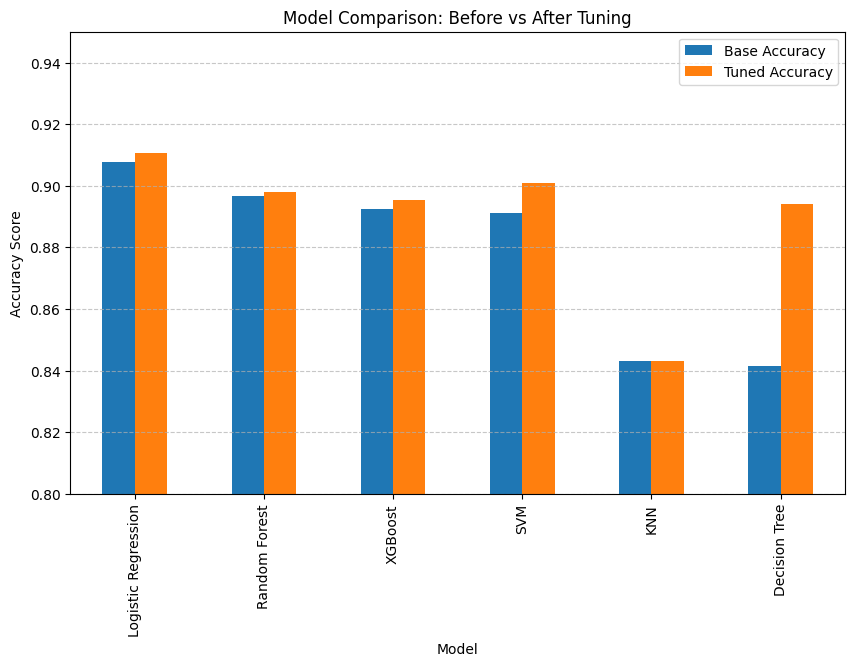

In [831]:

plot_data = comparison_df.set_index('Model')

# 2. Select only the two columns we want to compare
plot_data = plot_data[['Base Accuracy', 'Tuned Accuracy']]

# 3. Plot simple bar chart
plot_data.plot(kind='bar', figsize=(10, 6))

# 4. Add labels
plt.title("Model Comparison: Before vs After Tuning")
plt.ylabel("Accuracy Score")
plt.ylim(0.8, 0.95) # Zoom in to see the difference better
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add faint grid lines
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

#FINAL MODEL

In [832]:
# 1. Find the row with the highest Tuned Accuracy
best_row = comparison_df.loc[comparison_df['Tuned Accuracy'].idxmax()]
best_model_name = best_row['Model']
best_accuracy = best_row['Tuned Accuracy']

# 2. Retrieve the actual model object from our dictionary
best_model = tuned_models[best_model_name]

print(f"🏆 The Winner is: {best_model_name}")
print(f"🎯 Accuracy: {best_accuracy*100}")
print(f"⚙️ Best Parameters: {best_params[best_model_name]}")

🏆 The Winner is: Logistic Regression
🎯 Accuracy: 91.04683195592287
⚙️ Best Parameters: {'C': 1, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [833]:
from sklearn.metrics import accuracy_score

# 1. Predict on Training Data (You haven't done this in your code yet!)
y_train_pred = best_model.predict(X_train)

# 2. Predict on Test Data (You already have this)
y_test_pred = best_model.predict(X_test)

# 3. Calculate Scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy:     {test_acc*100:.2f}%")


Training Accuracy: 90.70%
Test Accuracy:     91.05%


#EXPORT PICKLE FILE

In [834]:
import joblib

In [835]:
print(best_model)

LogisticRegression(C=1, max_iter=2000, penalty='l1', solver='liblinear')


In [836]:
print(scaler)

StandardScaler()


In [837]:
# 1. Save the best model (Logistic Regression)
joblib.dump(best_model, 'best_model.pkl')

# 2. Save the scaler that was fitted on the ENTIRE X dataset
joblib.dump(scaler, 'scaler.pkl')

# 3. Save the exact column names
feature_names = student_data.drop('Target', axis=1).columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("✅ Model, Scaler, and Feature Names saved successfully!")


✅ Model, Scaler, and Feature Names saved successfully!


In [838]:
print(feature_names)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
